In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

**TASK 1**
-	Load a dataset using Pandas.
-	Explore the dataset (e.g., check for missing values, data types, summary statistics).
-	Visualize some important features using Seaborn.


In [2]:
column_names = ["target", "id", "timestamp", "query", "user", "text"]
df1=pd.DataFrame(pd.read_csv("./files/twitter.csv",names=column_names,encoding="ISO-8859-1"))

In [3]:
df1.sample(4)

,target,id,timestamp,query,user,text
1002815,4,1880254583,Fri May 22 00:36:20 PDT 2009,NO_QUERY,armeynsinaga,@marlissadessy what kind of surgery?
1230963,4,1991664013,Mon Jun 01 07:26:45 PDT 2009,NO_QUERY,Freesia13,@PembsDave @fligglegiggle: @PembsDave I love ...
761543,0,2297321727,Tue Jun 23 10:17:53 PDT 2009,NO_QUERY,Sweetie5683,it was hotter then the 4th circle of hell in t...
624178,0,2229808914,Thu Jun 18 16:14:11 PDT 2009,NO_QUERY,ranrenron,Is getting mad. What did i do? I didn't study ...


In [4]:
df1.isnull().sum()

target       0
id           0
timestamp    0
query        0
user         0
text         0
dtype: int64

In [5]:
df1.drop_duplicates()

,target,id,timestamp,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
df1.dtypes

target        int64
id            int64
timestamp    object
query        object
user         object
text         object
dtype: object

<Axes: xlabel='target', ylabel='count'>

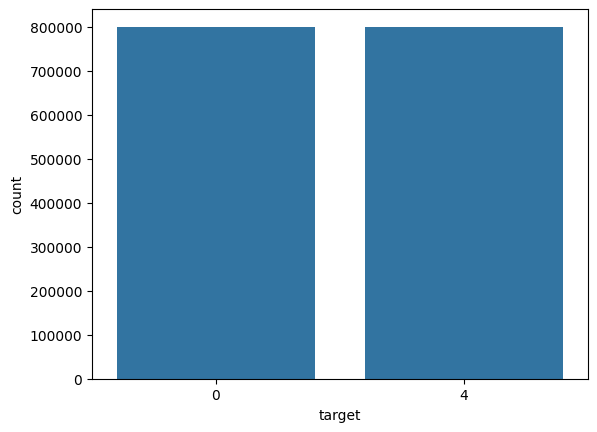

In [7]:
sns.countplot(data=df1,x="target")

In [8]:
from datetime import datetime

- Load a dataset suitable for classification.
- Split the dataset into training and testing sets using train_test_split.
- Train a Logistic Regression model on the training data.
- Evaluate the model using accuracy and F1-score.


In [9]:
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorization: Convert the preprocessed text data into numerical vectors. This step transforms text data into a format that machine learning algorithms can work with. Popular techniques for this include TF-IDF (Term Frequency-Inverse Document Frequency) or CountVectorizer.

In [10]:
x=df1['text']
y=df1['target']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,x_test.shape

((1280000,), (320000,))

In [13]:
y_train.shape,y_test.shape

((1280000,), (320000,))

In [14]:
vectorizer=TfidfVectorizer(max_features=100000)


In [15]:
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
model=LogisticRegression()
model.fit(x_train_vec,y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=model.predict(x_test_vec)
y_pred

array([4, 0, 4, ..., 4, 0, 0], dtype=int64)

In [19]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
541200,0,4
750,0,0
766711,0,4
285055,0,0
705995,0,4


In [20]:
correctly_classified = [1 if actual == predicted else 0 for actual, predicted in zip(results['Actual'], results['Predicted'])]

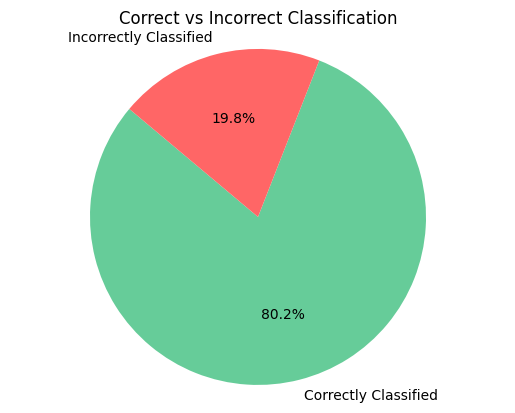

In [21]:
# Count number of correctly classified instances
num_correct = sum(correctly_classified)

# Count number of incorrectly classified instances (if needed)
num_incorrect = len(correctly_classified) - num_correct

# Create pie chart
labels = ['Correctly Classified', 'Incorrectly Classified']
sizes = [num_correct, num_incorrect]
colors = ['#66CC99', '#FF6666']  # Green for correctly classified, Red for incorrectly classified

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Correct vs Incorrect Classification')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.80170625
Precision: 0.8018492160143682
Recall: 0.80170625
F1 Score: 0.8016732593671053


Assignment 3: NLP Task with NLTK

Task:
- Preprocess a text dataset using NLTK.
- Perform stemming and lemmatization.
- Tokenize the text using regexp tokenizer.


In [24]:
d2=df1[['id','text']]

In [25]:
import nltk

- Removing punctuation marks
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Stemming
- Lemmatization


In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
import re

def remove_url(x):
    pattern=re.compile(r"(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?")
    return pattern.sub("",x)


In [28]:
d2['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [29]:
d2['clean1']=d2['text'].apply(lambda x : remove_url(x))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2676\2356842692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['clean1']=d2['text'].apply(lambda x : remove_url(x))


In [30]:
def remove_pun(x):
    punctuation="".join([i for i in x if i not in string.punctuation])
    return punctuation

In [31]:
d2['clean_msg']=d2['clean1'].apply(lambda x : remove_pun(x))
d2.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2676\2913624398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['clean_msg']=d2['clean1'].apply(lambda x : remove_pun(x))


,id,text,clean1,clean_msg
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot - Awww, that's a bummer. You sho...",switchfoot Awww thats a bummer You shoulda ...
1,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,1467810917,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1467811193,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [32]:
#to lower the text
d2['clean_low']=d2['clean_msg'].apply(lambda x : x.lower())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2676\926347052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['clean_low']=d2['clean_msg'].apply(lambda x : x.lower())


In [33]:
d2.head(3)

,id,text,clean1,clean_msg,clean_low
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot - Awww, that's a bummer. You sho...",switchfoot Awww thats a bummer You shoulda ...,switchfoot awww thats a bummer you shoulda ...
1,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,is upset that he cant update his facebook by t...
2,1467810917,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...,kenichan i dived many times for the ball manag...


Tokenization:Tokenization is the process of splitting the given text into smaller pieces called tokens. Words, numbers, punctuation marks, and others can be considered as tokens.

In [38]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [36]:
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [37]:
d2['clean_tokenize']=d2['clean_low'].apply(lambda x: tokenization(x))

Stemming
Stemming is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes (-ed, -ize, -de, -s, etc.) are added. The stem of a word is created by removing the prefix or suffix of a word. So, stemming a word may not result in actual words.

Lemmatization
Like stemming, lemmatization also converts a word to its root form. The only difference is that lemmatization ensures that the root word belongs to the language. We will get valid words if we use lemmatization. In NLTK, we use the WordNetLemmatizer to get the lemmas of words. 

In [39]:
porter_stemmer = PorterStemmer()
#defining a function for stemming
# def stemming(text):
# stem_text = [porter_stemmer.stem(word) for word in text]
#     return stem_text

In [40]:
def stem(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

In [42]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
# wordnet_lemmatizer = WordNetLemmatizer()

In [43]:
lemmatizer=WordNetLemmatizer()

In [44]:
def lemma(text):
    lemma=[lemmatizer.lemmatize(word) for word in text]
    return lemma

In [41]:
d2['stemming']=d2['clean_tokenize'].apply(lambda x : stem(x))

In [47]:
d2['stemming']


0          [switchfoot, awww, that, a, bummer, you, shoul...
1          [is, upset, that, he, cant, updat, hi, faceboo...
2          [kenichan, i, dive, mani, time, for, the, ball...
3          [my, whole, bodi, feel, itchi, and, like, it, ...
4          [nationwideclass, no, it, not, behav, at, all,...
                                 ...                        
1599995    [just, woke, up, have, no, school, is, the, be...
1599996    [thewdbcom, veri, cool, to, hear, old, walt, i...
1599997    [are, you, readi, for, your, mojo, makeov, ask...
1599998    [happi, 38th, birthday, to, my, boo, of, alll,...
1599999    [happi, charitytuesday, thenspcc, sparkschar, ...
Name: stemming, Length: 1600000, dtype: object

In [48]:
d2['lemmatization']=d2['clean_tokenize'].apply(lambda x : lemma(x))
d2.head()

,id,text,clean1,clean_msg,clean_low,clean_tokenize,stemming,lemmatization
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot - Awww, that's a bummer. You sho...",switchfoot Awww thats a bummer You shoulda ...,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, a, bummer, you, shou...","[switchfoot, awww, that, a, bummer, you, shoul...","[switchfoot, awww, thats, a, bummer, you, shou..."
1,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[is, upset, that, he, cant, updat, hi, faceboo...","[is, upset, that, he, cant, update, his, faceb..."
2,1467810917,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...,kenichan i dived many times for the ball manag...,"[kenichan, i, dived, many, times, for, the, ba...","[kenichan, i, dive, mani, time, for, the, ball...","[kenichan, i, dived, many, time, for, the, bal..."
3,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, bodi, feel, itchi, and, like, it, ...","[my, whole, body, feel, itchy, and, like, it, ..."
4,1467811193,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...,"[nationwideclass, no, its, not, behaving, at, ...","[nationwideclass, no, it, not, behav, at, all,...","[nationwideclass, no, it, not, behaving, at, a..."
